In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## sub plots layout

In [6]:
#create two objects :fig , ax
#fig, ax=plt.subplots(2,2)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

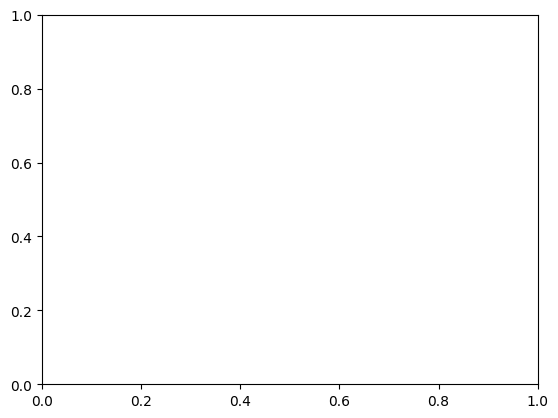

In [8]:
fig, ax=plt.subplots()
df['job_title_short'].value_counts()

In [11]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

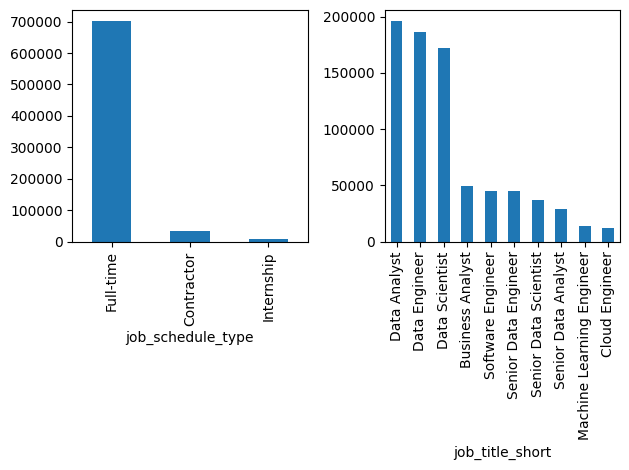

In [ ]:
fig,ax= plt.subplots(1,2)
#Creates one figure (fig) containing 1 row and 2 columns of subplots.
#fig = the entire figure , ax is an array of Axes objects (each Axes is an individual plot area)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout() #Adjusts spacing between the two plots so they don’t overlap.


In [24]:
df_skills=df
df_skills=df_skills.explode('job_skills')
df_skills=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [25]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [29]:
job_titles= ['Data Scientist','Data Engineer','Data Analyst']

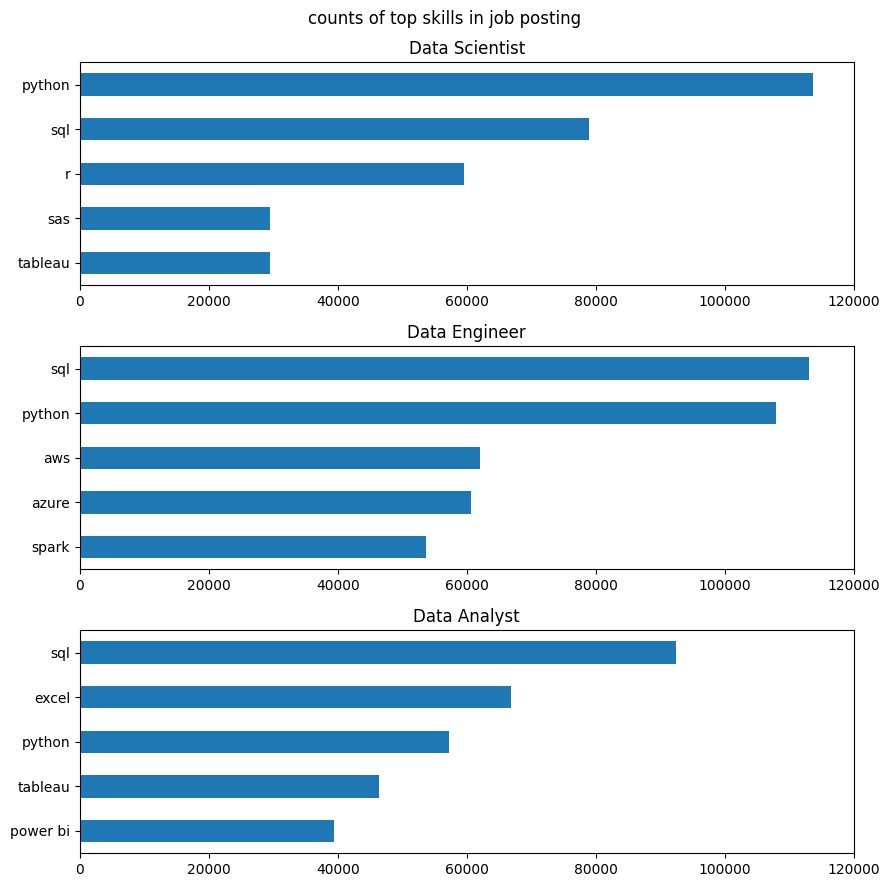

In [79]:
fig,ax=plt.subplots(3,1,figsize=(9, 9))

for i,job_title in enumerate(job_titles):
      df_plot=df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
      df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title) 
      #ax[i] because enumerate function provide index
      ax[i].invert_yaxis()
      ax[i].set_ylabel('')
      ax[i].legend().set_visible(False)
      ax[i].set_xlim(0,120000)

fig.suptitle('counts of top skills in job posting',fontsize=12)
fig.tight_layout() #should be always the last thing after finish other modfication to avoid overlap

## summary

In [ ]:
#syntax: for index, item in enumerate(iterable):
# but item after for can be optional like:
# One plot → use plt.invert_yaxis(), Multiple subplots → use ax[i].invert_yaxis()
#ax (as a parameter) → tells pandas or matplotlib *which Axes (plot area)* to draw the chart on.
#syntax :figsize = (width, height)